# Sheet Code

## Funciones no lineales

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
pibe = cv2.cvtColor(cv2.imread('res/pibe.jpg'), cv2.COLOR_BGR2RGB)

### Parabola

In [5]:
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (parábola)
def non_linear_parabola(img, a, b, c):
    
    #Crear copia de la imagen con datos flotantes dado que se normalizarán
    img_copy = img.astype(np.float32)/255.0
    #Una parábola tiene la forma ax² + bx + c, donde x es la imagen de entrada
    #A partir de la imagen, generar ax²
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    #Generar bx
    res_b = cv2.multiply(img_copy,b)
    #Sumar ax² + bx + c
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    #Asegurar que los datos queden entre 0 y 255 y regresar al dato uint8
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res 

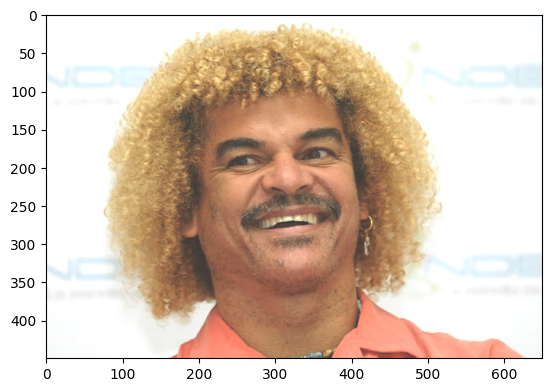

In [7]:
pibeParabola = apply_f_on_rgb(pibe, non_linear_parabola, (0.7, 0.4, 0.2))
plt.imshow(pibeParabola)

### Raíz

In [8]:
#Definir la función de transformación de la imagen (raíz)
def non_linear_root(img, a, b):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función raíz es de la forma ax⁰⁵ + b, donde x es la imagen de entrada
    res_a = cv2.pow(img_copy,0.5)
    res_a = cv2.multiply(res_a, a)
    res = cv2.add(res_a,b)
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

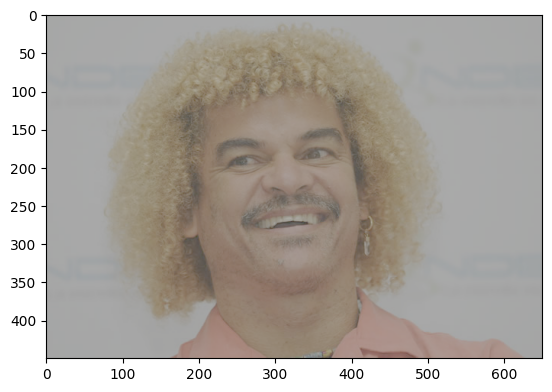

In [11]:
pibeRaiz = apply_f_on_rgb(pibe, non_linear_root, (0.5, 0.2))
plt.imshow(pibeRaiz)

### Gamma

In [12]:
#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

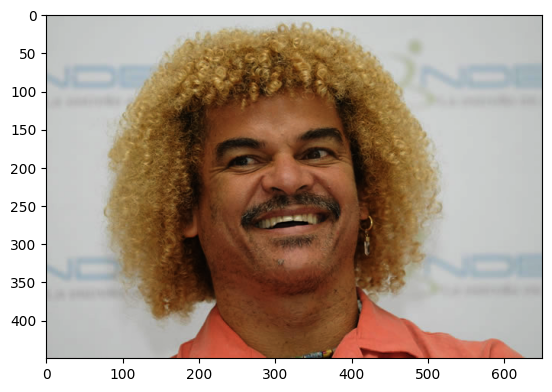

In [17]:
pibeGamma = apply_f_on_rgb(pibe, gamma_correction, (1, 1.5))
plt.imshow(pibeGamma)

### Normalización

In [9]:
#Definir la función expansión del histograma cuyo parámetro es una imagen
def histogram_expansion(img):
    
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros([img.shape[0], img.shape[1]], dtype=np.float32)
    
    #Extraer el mínimo y el máximo del conjunto de datos
    m = float(np.min(img))
    M = float(np.max(img))
    #Aplicar la función de expansión(normalización) y asegurar datos uint8
    res = (img-m)*255.0/(M-m)
    res = res.astype(np.uint8)
    
    return res

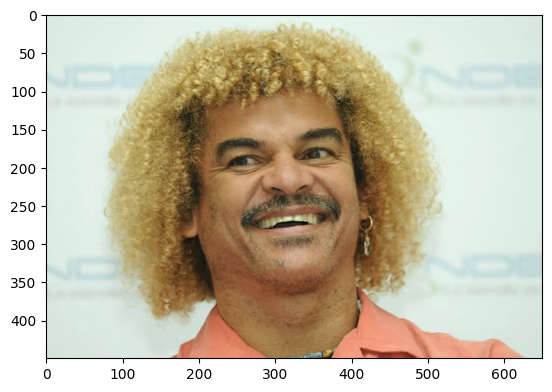

In [10]:
pibeNormalizado = apply_f_on_rgb(pibe, histogram_expansion, ())
plt.imshow(pibeNormalizado)

### Ecualización Uniforme

In [11]:
#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), density=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g] + gmin
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

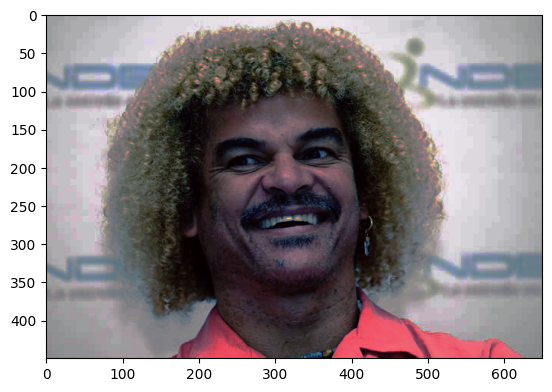

In [12]:
pibeEcualizado = apply_f_on_rgb(pibe, histogram_equalization, ())
plt.imshow(pibeEcualizado)

## Operaciones binarias

In [13]:
imagen1 = np.zeros((15,15),np.uint8)
imagen2 = imagen1.copy()
imagen1 = cv2.rectangle(imagen1,(5,5),(10,10),255,-1)
imagen2 = cv2.rectangle(imagen2,(3,3),(12,12),255,-1)

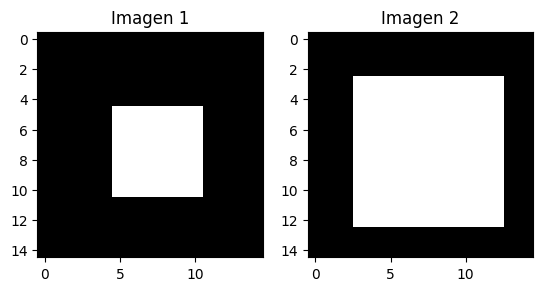

In [14]:
_, plots = plt.subplots(1,2)
plots[0].set_title('Imagen 1')
plots[0].imshow(imagen1, cmap='gray')
plots[1].set_title('Imagen 2')
plots[1].imshow(imagen2, cmap='gray')

### AND

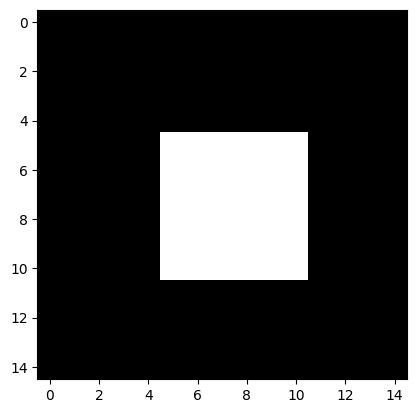

In [15]:
cuadradoAnd = cv2.bitwise_and(imagen1,imagen2)
plt.imshow(cuadradoAnd, cmap='gray')

### OR

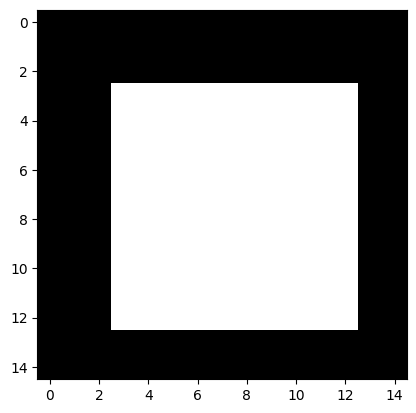

In [16]:
cuadradoOr = cv2.bitwise_or(imagen1,imagen2)
plt.imshow(cuadradoOr, cmap='gray')

### XOR

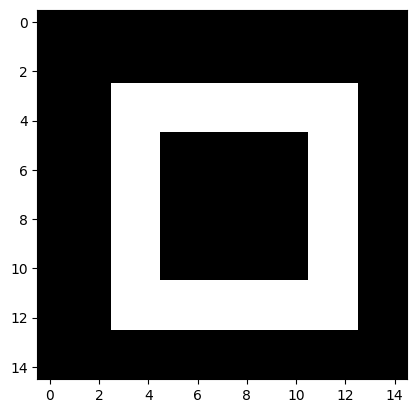

In [17]:
cuadradoXOR = cv2.bitwise_xor(imagen1,imagen2)
plt.imshow(cuadradoXOR, cmap='gray')

### Cuadrado NOT

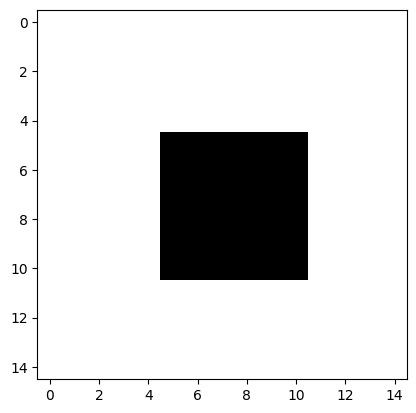

In [18]:
cuadradoNOT = cv2.bitwise_not(imagen1)
plt.imshow(cuadradoNOT, cmap='gray')